<a href="https://colab.research.google.com/github/ali-unlu/Comparative-Principal-Component-Analysis-PCA-/blob/main/Comparative_PCA_in_K_Means_Clustering_and_Prediction_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Credit Risk Data

# 1. Aim of the analysis and data

Large datasets are increasingly common and are often difficult to interpret. Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

In this analysis, I will demostrate how PCA works in different tasks and how much time and resources we save in our daily analysis. To do do, I will make a basic EDA analysis and then build a PCA model. I will first apply the PCA output on K-Means clustering analysis.

After that, I will demonstrate how many dimensions are enoughh to reach certain accuracy level in logistic regression analysis. 

Finally, I will re-analysis the data with and withour PCA across three models. The results and computation time show us how valuable the PCA in our analysis. 






### Data

__Context__

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

__Content__

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Data set could be reach from Kaggle web [page from this link.](https://www.kaggle.com/mlg-ulb/creditcardfraud) 

### Data load

In [ ]:
import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('creditcard.csv')

Dimension of the data

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
data.duplicated().sum()

1081

In [ ]:
data.drop_duplicates(keep= False, inplace= True)


As seen from above, there are 31 variables and more 288.000 rows. So, PCA analysis definetely suits well on this type of analysis. 

__Basic summary:__
1. There are 30 float variables and only an integer (in binary format), which is also the target variable. 
2. When we checked, we identified 1081 dublicated value, so we removed them. 
3. There is no label and no information about the features. 

# 2. Data processing

Since the dataset is too big to check them one by one, I will follow these steps:


1. I will check out if the variables have missing variables.
2. I will checked whether variables have binary and categorical features. If so, I will process them accordingly. 
3. I will also normalize the data with scaling and log transformations if necessary. 

### Missing variables

Let's check whether we have missing variables.


In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_data = missing_values_table(data)
missing_data.head(10)
#missing_train_vars = list(missing_data.index[missing_data['% of Total Values'] > 90])
#len(missing_train_vars)

Your selected dataframe has 31 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


It looks that we do not have any missing values in our data set, which is increadible. 

## Basic EDA

In [ ]:
Target = 'Class'
data[Target].value_counts(normalize = 'True')

0    0.998374
1    0.001626
Name: Class, dtype: float64

As mentioned in data description, this is a highly unbalanced data since the fraud is not a usual thing for banks. So, we need to impute data to make it more balanced. 

## data types

Although all the features are in numeric format, it worths to check whether it has less unique feature. For instance, I treat as a binary variable if it has only two unique values. Similarly, if the feature has less then 6 and more than 2 unique values, I treat them a categoric variable. Neverheless, you need to be carefull because sometimes even with small units, the variable has a continious feature.  


In [ ]:
data_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
data_uniques


,Unique Values
Variable,
Time,124527
V1,274897
V2,274897
V3,274897
V4,274897
V5,274897
V6,274897
V7,274897
V8,274897


In [ ]:
binary_variables = list(data_uniques[data_uniques['Unique Values'] == 2].index) 
binary_variables

['Class']

In [ ]:
# Categorical variables
categorical_variables = list(data_uniques[(6 >= data_uniques['Unique Values']) & (data_uniques['Unique Values'] > 2)].index)
categorical_variables

[]

We can be sure that only Class variable is binary and no other variable could be classified as categorical variables. Thus, we can treat rest of the variables as numeric values. 

# Preprocessing

### Oversampling

We need to separate target variable from the data set because we will apply PCA and K-Means clustering, such an unsupervised machine learning model. 

In [ ]:
X = data.drop(['Class'], axis= 1)
y = data['Class']

In [ ]:
# Because the Target is imbalance, i try to balance the data with SMOTE(OverSampling)
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=46)
X, y = sm.fit_resample(X, y)


**Distribution after the Smote**

In [ ]:
X.shape

(564986, 30)

Oversampling nearly doubles our simple size to balance our target variable.

In [ ]:
y.value_counts(normalize= True)

0    0.5
1    0.5
Name: Class, dtype: float64

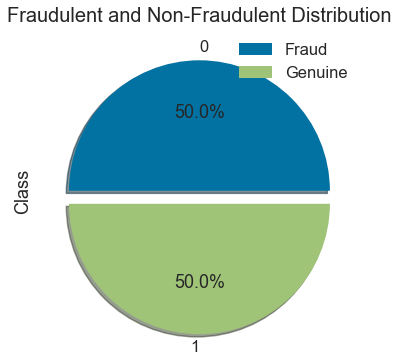

In [ ]:
y.value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Genuine"])
plt.show()


### Skewed data

It is also good to important to normalize the distibution of the variables. To do so, I first check how many skewed variables we have and then I will take their logs to normalize the distribution. I use 0.75 threshold level for the skewness. 

In [ ]:
skew_columns = (X
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75] 
skew_columns

Amount    13.318782
V28        2.507108
V20        1.814151
V22        1.559533
V2         1.467836
V11        1.056789
V4         0.775997
dtype: float64

In [ ]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    X[col] = np.log1p(X[col])

### Scaling

Since we have many features, it is important to arrange them in the same scale. For instance, feature such has amount has higher values, which affects its weights on other features. For this analysis, I use standard scaler. 

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler


X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)


In [ ]:
X.head().T

,0,1,2,3,4
Time,-1.789873,-1.789873,-1.789852,-1.789852,-1.789832
V1,0.168595,0.661423,0.168876,0.244602,0.207527
V2,-0.761909,-0.462955,NaN,-0.885962,-0.084798
V3,1.015734,0.607583,0.884303,0.887710,0.845640
V4,-0.029334,-0.480805,-0.524825,-2.628953,-0.509614
V5,0.279670,0.380381,0.237984,0.362601,0.262257
V6,0.753283,0.410275,1.595841,1.247451,0.522533
V7,0.544148,0.482916,0.650276,0.543765,0.612099
V8,-0.120456,-0.124134,-0.080149,-0.045041,-0.220353
V9,0.758927,0.471807,-0.112080,-0.052899,0.969419


### 2.5. Correlation table
Finally, I would like to see whether there is a high correlation between our features. The result shows only one correlation score is above the 0.90 level and the rest are pretty good to proceed the analysis.

<AxesSubplot:>

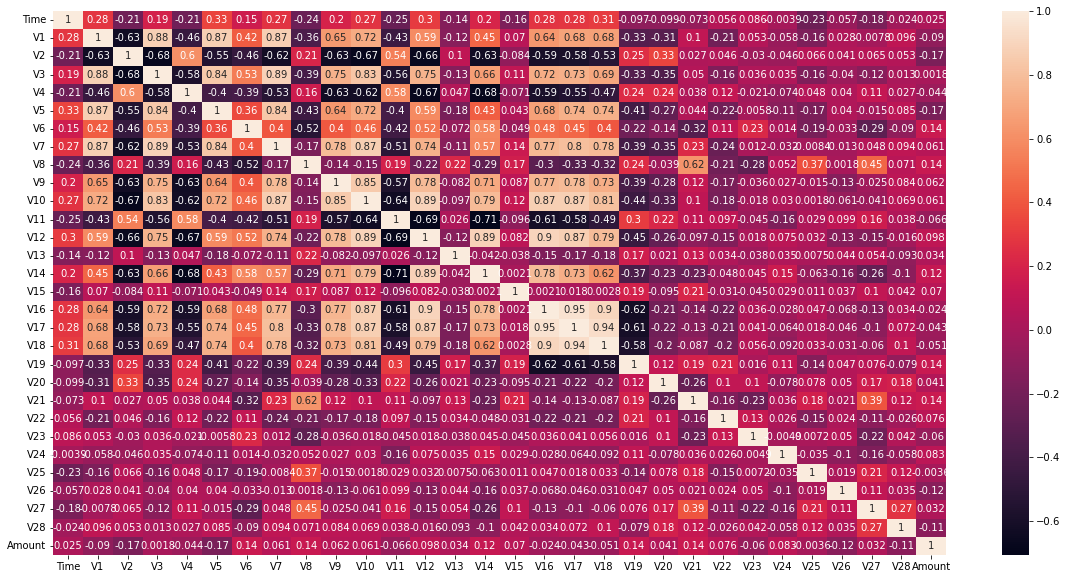

In [ ]:
# The correlation matrix
corr_mat = X.corr()
    
f,ax=plt.subplots(figsize=(20,10))

sns.heatmap(corr_mat,annot=True)


# 3. PCA Analysis

K-means, DBSCAN and agglomerative clustering, all use the Euclidean distance, which starts to lose its meaning when the number of dimensions starts increasing. So, before using these methods, we have to reduce the number of dimensions. I'm going to use PCA, which is by far the most popular dimensionality reduction algorithm.

here I set parameter n_components equals to 0.9, which means that the PCA will automatically produce enough PCs that will preserve 90% of variance in the dataset.

Scaling and log transformation enlarge some values in columns, which inhibit PCA. Particularly, the size of the float in cells make analysis complicated and currupt the analysis. I found this solution on internet and it works well for me. 

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
new_df = clean_dataset(X)
new_df.head().T

,0,1,3,4,5
Time,-1.789873,-1.789873,-1.789852,-1.789832,-1.789832
V1,0.168595,0.661423,0.244602,0.207527,0.348957
V2,-0.761909,-0.462955,-0.885962,-0.084798,-0.043398
V3,1.015734,0.607583,0.887710,0.845640,0.775439
V4,-0.029334,-0.480805,-2.628953,-0.509614,-0.985502
V5,0.279670,0.380381,0.362601,0.262257,0.471645
V6,0.753283,0.410275,1.247451,0.522533,0.443416
V7,0.544148,0.482916,0.543765,0.612099,0.589649
V8,-0.120456,-0.124134,-0.045041,-0.220353,-0.076729
V9,0.758927,0.471807,-0.052899,0.969419,0.326559


In [ ]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 21):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(new_df)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': new_df.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.366914
2,PCA(n_components=2),0.496037
3,PCA(n_components=3),0.573922
4,PCA(n_components=4),0.620512
5,PCA(n_components=5),0.662139
6,PCA(n_components=6),0.702652
7,PCA(n_components=7),0.737733
8,PCA(n_components=8),0.770184
9,PCA(n_components=9),0.798425


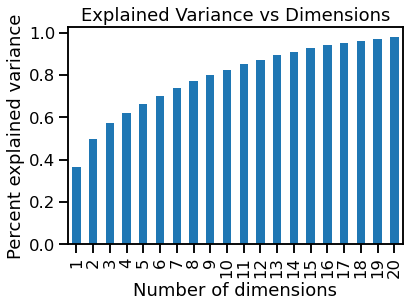

In [ ]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

As seen above, we can reach above 0.90 levels only with 13 dimensions. Even if we include too many dimensions, improvement in explained variance does not change after certain levels. Now, let's create a new data that holds the proper amount of PCA dimensions, such as 0.90 threshold. 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, random_state=42)
pca.fit(new_df)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(new_df), columns=PC_names)

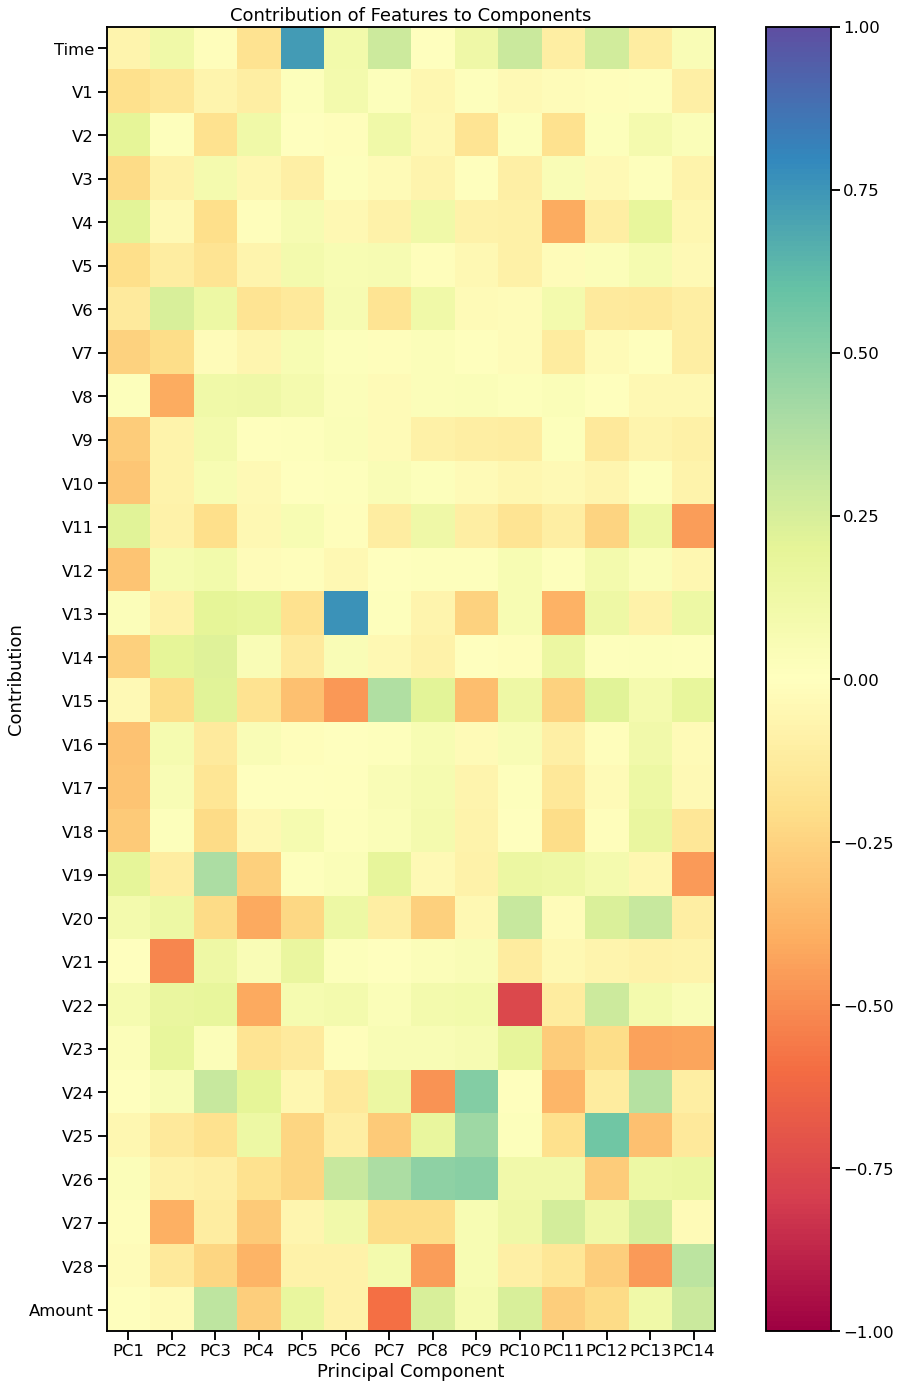

In [ ]:
fig, ax = plt.subplots(figsize=(18, 24))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(new_df.columns)), new_df.columns)
plt.xticks(range(len(pca_data.columns)), pca_data.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

# 4. K-Means

After we reduced the dimension of the data, we can apply K-Means clustering technique. We can first visually control how inertia reduces by the number of clusters. 

__Some notes about K-Means:__ When I enforced K-Means to cluster the data into two pieces, it could not succesfull to separate according to our target variable. I test with SMOTE and without it, as well as with PCA and without PCA but the results are not improved that much. I assume that K-Means identifies several strong patterns that cannot fit in only two clusters even though we oversample the data based on our target variable. So, to make sure, I conducted this analysis.

In [ ]:
from sklearn.cluster import KMeans

km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(pca_data)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

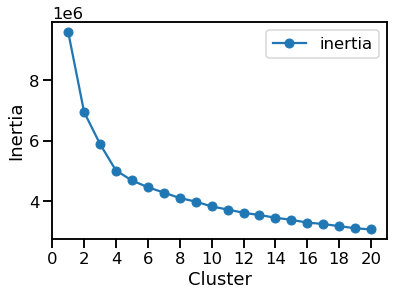

In [ ]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');


As seen above, we can determine the the cluster size by visual checking but the KElbow visualizer is also a good tools to select the best parameter.

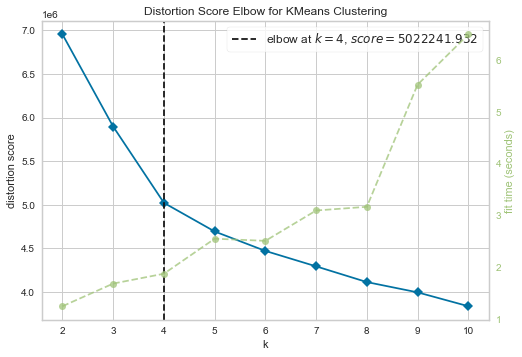

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans

# elbow method
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,11))

distortion_visualizer.fit(pca_data)       
distortion_visualizer.show() 

As seen above, 4 k works well to cluster this data set. It means that K-Means clustering infers 4 different customer types here. Normally we know that this data set is mainly for predicting fraud detection but the analysis also reveals other pathers. It might be the total customer classifications, including who make frauds. 



In [ ]:
km_model = KMeans(distortion_visualizer.elbow_value_, random_state=42)
labels = km_model.fit_predict(pca_data)

Now I add these labels to 2 dataframes:

__X:__ imputed, standardized dataframe  
__pca_data:__ Transformed data after PCA  

In [ ]:

X['LABELS'] = labels
pca_data['LABELS'] = labels

<AxesSubplot:ylabel='LABELS'>

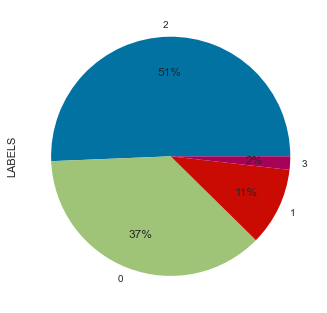

In [ ]:
# Let's see how our data is distributed among these 5 clusters:
pca_data.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)



As shortly mentioned above, K means identifies four clusters. It is difficult to infer from this chart about their characteristics of the customers but for instance it is possible that cluster 3 with 2% might the ones who are making frauds. 

 ### Evaluate the Model
 
Let's see how good/bad is our model.

**we start by caculating two metrics:**



__The Davis-Bouldin Index__ is the average similarity between each cluster and the closest cluster. Scores range from 0 and up. 0 indicates better clustering.

__The Silhouette Coefficient__ is a value between -1 and 1. The higher the score, the better. 1 indicates tight clusters, and 0 means overlapping clusters.

In [ ]:
# cluster metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

print(f'Davies-Bouldin index = {davies_bouldin_score(pca_data, labels)}')
print(f'Silhouette Score = {silhouette_score(pca_data, labels)}')

Davies-Bouldin index = 1.2994143257810908
Silhouette Score = 0.2621085844232493


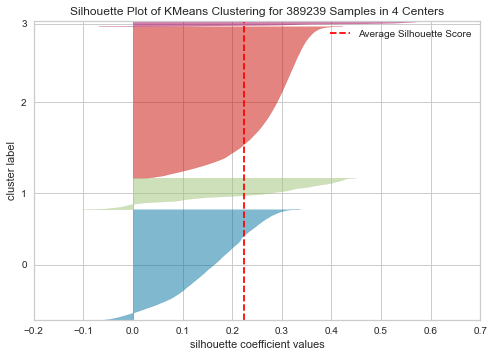

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 389239 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer


visualizer = SilhouetteVisualizer(km_model, colors='yellowbrick')
visualizer.fit(pca_data.drop(['LABELS'],axis=1))
visualizer.show()

Here, the vertical dotted red line in this plot is the average score. It looks like our clustering method is good, since each cluster bumps out above the average, and the cluster scores look decent.

### Interpreting the results

We have nice clusters, but what do they mean? let's figure out.




In [ ]:
def spider_plot(data, title):
    means = data.groupby("LABELS").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()

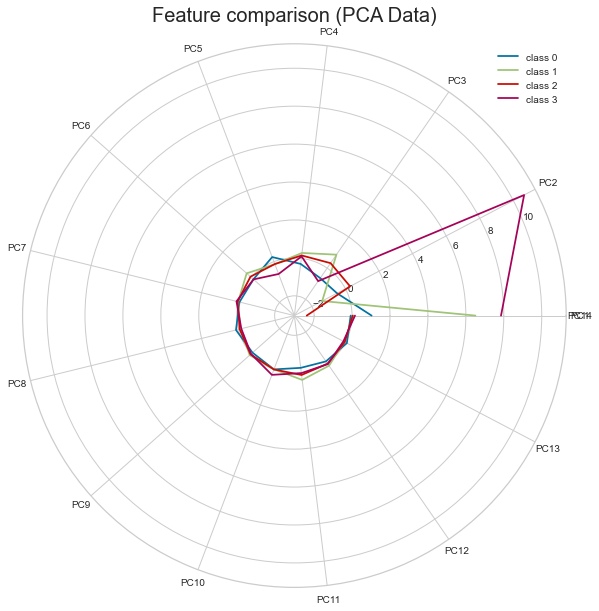

In [ ]:
spider_plot(pca_data, 'PCA Data')


It looks like PC1, PC2 and PC3 were the most important Principal Components. Let's get the same plot, this time for original features. However, class 3 has a significant interactions and it can be recognizable within these 3 PCA components.


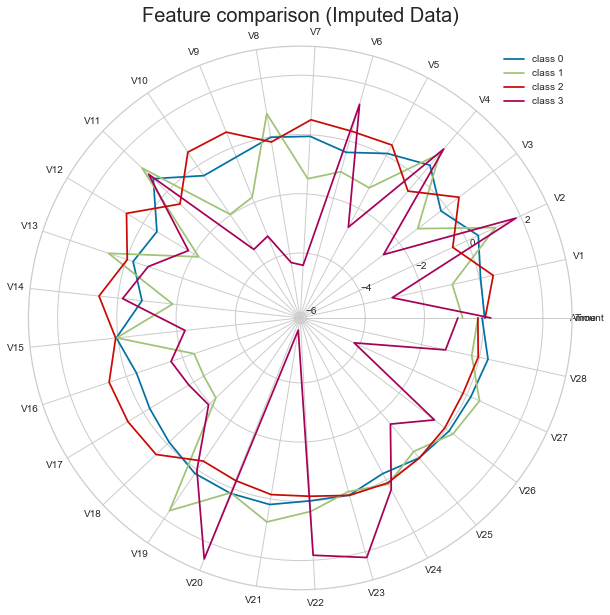

In [ ]:
spider_plot(X, 'Imputed Data')


- Since we do not know much about the labels of the data set, it is difficult to estimate how clusters interact across features.
- Nevertheless, we can see some patterns on class movements. For instance, class 3 has different shapes across features. On some features, customers in these cluster go extreme and on some features, they are under the avarage interactions. 
- Class 0 and class 2 has similar interactions across features but class 1 has some ups and downs across features.
- If we have labels and more information about the features, we will have more power to interpret the results but I guess that class 3 is our customer group that we are looking for in this data set. 

# 5. Prediction with PCA data

In this stage of the analysis, I will show how much the accuracy level change when the PCA clusters change. Since we know theoretically that the more feature and the more complex the model, the more overfitting problem we have. Thus, one of the ultimate aim of the machine learning is to build more simple models to make better prediction. 

In this part of the analysis, I will use PCA data and test logistic regression prediction accuracy across PCA dimensions. It will show us how much the more dimension contribute the accuracy of the model. I will apply similar approach but since I will use pipeline method, I will rebuilt the model from the sratch. 

In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

X = data.drop('Class', axis=1)
y = data.Class
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        X_train, y_train = sm.fit_resample(X_train, y_train)
        X_test, y_test = sm.fit_resample(X_test, y_test)


        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [1, 5, 10, 15, 20, 25, 30]
score_list = [get_avg_score(n) for n in ns]

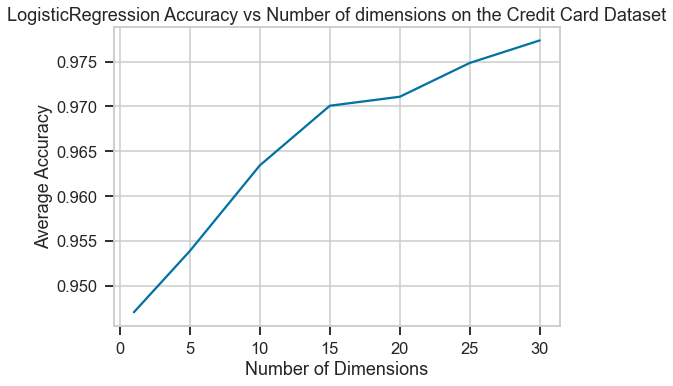

In [ ]:
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Credit Card Dataset')
ax.grid(True)

As shown above, even with 5 dimensions, we can predict the target with more than 0.95 accuracy rate. Since the dataset has 30 features, computation of more than 300.000 rows needs more sources and power however PCA analysis faciliates this process. 

# 6. Prediction with Grid Search 

In this step, I want to demostrate how the accuracy rate change with and without PCA analysis. I will test only logistic regresion model here. I will also use similar method for data normalization and scaling.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Load and split the data
X = data.drop('Class', axis=1)
y = data.Class

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Smote
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)


# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=6)),
			('clf', LogisticRegression(random_state=42))])


# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 



# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=4) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=4)
			


# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA'}



In [ ]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(y_test, y_pred) > best_acc:
		best_acc = accuracy_score(y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file
dump_file = 'best_gs_pipeline.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.980
Test set accuracy score for best params: 0.984 

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.955
Test set accuracy score for best params: 0.958 

Classifier with best test set accuracy: Logistic Regression

Saved Logistic Regression grid search pipeline to file: best_gs_pipeline.pkl


# 7. Summary

- I tested PCA performance in three different analysis. 
- PCA generated data works well in K-Means cluster analysis. We can handle the analysis and produce meanfull results with less resources and time. 
- Logistic regression analysis showed that with 5-6 PCA dimensions, we can reach over 0.955 accuracy rate in our prediction rates. So, you can think how much PCA valuable if you have to deal with huge data sets.  
- The last analysis shows that with PCA, the accuracy score is lower than the base model however the difference is considerable small (0.980 vs 0.958). 





I benefited from the [Mohammad Namvarpour post](https://www.kaggle.com/halflingwizard/interpret-k-means-clusters-on-credit-card-dataset/notebook) when doing K-Means cluster analysis.  